In [1]:
import tensorflow as tf
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:

faceCascade = cv.CascadeClassifier(cv.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades+'haarcascade_eye.xml')

print(faceCascade.empty())

# new_model = tf.keras.models.load_model('my_model.h5')
new_model = tf.keras.models.load_model('content/saved_model/my_model')
path = 'haarscascade_frontalface_default.xml'



False


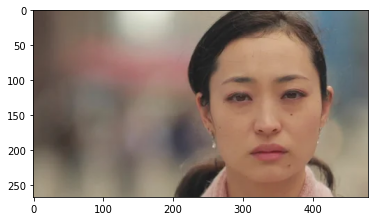

In [3]:
img = cv.imread('young-asian-woman-sad-portrait-footage-042750107_iconl.webp')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [4]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h,x:x+w]

    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
           print("Eyes are not detected")
    else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]

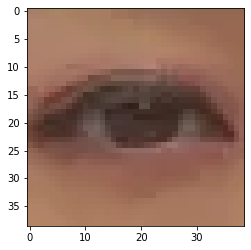

In [5]:
plt.imshow(cv.cvtColor(eyes_roi,cv.COLOR_BGR2RGB))

In [6]:
eyes_roi.shape

(39, 39, 3)

In [7]:
final_image = cv.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0
final_image.shape

(1, 224, 224, 3)

In [8]:
new_model.predict(final_image)

: 

: 

In [1]:
cap = cv.VideoCapture(1)
if not cap.isOpened():
    cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError('cannot open webcam')

while True:
    ret,frame = cap.read()
    gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    eyes_roi = []
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]
    print(eyes_roi)
    final_image = []
    if len(eyes_roi) != 0 :
        final_image = cv.resize(eyes_roi,(224,224))
    final_image = np.expand_dims(final_image,axis=0)

    Predictions = new_model.predict(final_image)

    if (Predictions > 0): status = "Open eyes"
    else: status = "Closed eyes"

    gray =cv.cvtColor(frame,cv.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray,1.1,4)

    for (x,y,w,h) in faces:
        cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

    font = cv.FONT_HERSHEY_COMPLEX_SMALL

    cv.putText(frame,status,(50,50),font,3,(0,0,255),2,cv.LINE_4)

    cv.imshow("Drowesiness Detection",frame)

    if cv.waitKey(2) & 0xFF == ord('q'):
        break

    cap.release()
    cv.destroyAllWindows()

NameError: name 'cv' is not defined